In [1]:
import spacy
from spacy.lang.pl.examples import sentences
from utils import read_bills
import os
import collections
from typing import List
import matplotlib.pyplot as plt
from operator import itemgetter
import pickle
from elasticsearch import Elasticsearch
import requests as rq

# Load spacy tokenizer https://spacy.io/models/pl and see how it works

In [2]:
nlp = spacy.load("pl_core_news_sm")
doc = nlp(sentences[0])

In [3]:
print(doc.text)

Poczuł przyjemną woń mocnej kawy.


In [4]:
for token in doc:
    print(token.text, token.pos_, token.dep_)

Poczuł VERB ROOT
przyjemną ADJ amod
woń NOUN obj
mocnej ADJ amod
kawy NOUN nmod:arg
. PUNCT punct


# Read bills without normalization

In [5]:
current_dir = os.getcwd()
bills_dict = read_bills(f"{current_dir}/data/first_ex_data/ustawy")

In [10]:
current_dir

'/Users/kamil/Documents/NLP'

In [6]:
len(bills_dict.values())

1178

In [7]:
bills_dict["1999_700"]

' dzu z 1999 r nr 63 poz 700 ustawa z dnia 8 lipca 1999 r o zmianie ustawy o powszechnym ubezpieczeniu zdrowotnym art 1 w ustawie z dnia 6 lutego 1997 r o powszechnym ubezpieczeniu zdrowotnym dzu nr 28 poz 153 i nr 75 poz 468 z 1998 r nr 117 poz 756 nr 137 poz 887 nr 144 poz 929 i nr 162 poz 1116 oraz z 1999 r nr 45 poz 439 i nr 49 poz 483 w art 169c w ust 2 wyrazy 30 czerwca 1999 r zastępuje się wyrazami 31 grudnia 1999 r art 2 środki finansowe przekazane właściwym kasom chorych w okresie od dnia 1 lipca 1999 r do dnia wejścia w życie niniejszej ustawy zalicza się na poczet kwot przewidzianych w planie finansowym sporządzonym przez pełnomocnika rządu do spraw wprowadzenia ubezpieczenia zdrowotnego art 3 ustawa wchodzi w życie z dniem ogłoszenia '

In [11]:
with open('bills_dict.pickle', 'wb') as handle:
    pickle.dump(bills_dict, handle)

with open('bills_dict.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(bills_dict == b)

True


# Use SpaCy tokenizer API to tokenize the text from the cleaned law corpus.

In [8]:
tokenized_bills = {}
for file_id, file_content in bills_dict.items():
    tokens = nlp(file_content)
    tokenized_bills[file_id] = [token.text for token in tokens]

# Compute frequency list for each of the processed files.

In [11]:
frequency_per_bill = {
    bill_id : collections.Counter(tokens) for bill_id, tokens in tokenized_bills.items()
}

In [13]:
frequency_per_bill['1999_700']

Counter({' ': 1,
         'dzu': 2,
         'z': 6,
         '1999': 6,
         'r': 8,
         'nr': 9,
         '63': 1,
         'poz': 9,
         '700': 1,
         'ustawa': 2,
         'dnia': 4,
         '8': 1,
         'lipca': 2,
         'o': 3,
         'zmianie': 1,
         'ustawy': 2,
         'powszechnym': 2,
         'ubezpieczeniu': 2,
         'zdrowotnym': 2,
         'art': 4,
         '1': 2,
         'w': 7,
         'ustawie': 1,
         '6': 1,
         'lutego': 1,
         '1997': 1,
         '28': 1,
         '153': 1,
         'i': 3,
         '75': 1,
         '468': 1,
         '1998': 1,
         '117': 1,
         '756': 1,
         '137': 1,
         '887': 1,
         '144': 1,
         '929': 1,
         '162': 1,
         '1116': 1,
         'oraz': 1,
         '45': 1,
         '439': 1,
         '49': 1,
         '483': 1,
         '169c': 1,
         'ust': 1,
         '2': 2,
         'wyrazy': 1,
         '30': 1,
         'czerwca': 1,


In [14]:
frequency_per_bill['1993_599']

Counter({' ': 1,
         'dzu': 4,
         'z': 114,
         '1993': 9,
         'r': 20,
         'nr': 22,
         '129': 2,
         'poz': 20,
         '599': 2,
         'ustawa': 2,
         'dnia': 12,
         '9': 10,
         'grudnia': 9,
         'o': 41,
         'zmianie': 1,
         'ustawy': 10,
         'podatku': 42,
         'od': 28,
         'towarów': 50,
         'i': 159,
         'usług': 29,
         'oraz': 32,
         'akcyzowym': 4,
         'art': 75,
         '1': 77,
         'w': 227,
         'ustawie': 1,
         '8': 10,
         'stycznia': 2,
         '11': 12,
         '50': 5,
         '28': 5,
         '127': 1,
         'wprowadza': 1,
         'się': 66,
         'następujące': 1,
         'zmiany': 1,
         '3': 62,
         'a': 37,
         'dotychczasowa': 1,
         'treść': 1,
         'otrzymuje': 19,
         'oznaczenie': 2,
         'ust': 118,
         'b': 23,
         'dodaje': 22,
         '2': 69,
         'brzmieniu'

# Aggregate the result to obtain one global frequency list.

In [19]:
def flatten(l) -> List:
    return [item for sublist in l for item in sublist]

In [30]:
all_tokens = flatten(tokenized_bills.values())
global_frequency_list = collections.Counter(all_tokens)

print(f"{global_frequency_list}")

Counter({'w': 201179, 'i': 89919, 'art': 83609, 'z': 82458, '1': 70647, 'o': 64765, 'do': 60746, '2': 56035, 'ust': 53368, 'na': 50645, 'się': 45884, 'lub': 45799, 'poz': 45028, 'nr': 44944, '3': 37624, 'oraz': 33564, 'r': 33063, 'mowa': 28783, '4': 23154, 'nie': 22985, 'przez': 20952, 'pkt': 19124, 'dnia': 17954, 'których': 17934, 'a': 16823, '_': 16809, 'od': 16683, '5': 16635, 'po': 13546, 'jest': 13197, 'ustawy': 13099, '6': 12153, 'może': 12096, 'jeżeli': 12038, 'którym': 11790, 'za': 11138, 'brzmienie': 10576, 'spraw': 10021, 'otrzymuje': 9835, 'albo': 8708, '7': 8508, 'dodaje': 8422, 'ich': 8199, 'dla': 7937, 'pracy': 7631, 'minister': 7569, 'której': 7477, 'brzmieniu': 7296, 'drodze': 7179, 'podstawie': 6853, 'b': 6779, 'stosuje': 6680, 'przypadku': 6503, 'niż': 6452, 'tym': 6366, 'jego': 6320, '8': 6166, 'są': 6156, 'być': 6120, 'zakresie': 6101, 'właściwy': 6094, 'przepisy': 5838, 'państwa': 5837, 'wyrazy': 5816, 'dzu': 5766, 'ze': 5509, 'ustawie': 5479, 'także': 5447, 'przep

In [46]:
len(global_frequency_list)

64458

In [52]:
"żćńóto".isalpha()

True

# Reject all entries that are shorter than 2 characters or contain non-letter characters (make sure to include Polish diacritics).

In [53]:
# https://spacy.io/usage/linguistic-features
filtered_tokens = [token for token in all_tokens if token.isalpha() and len(token) >= 2]

In [54]:
filtered_tokens

['dzu',
 'nr',
 'poz',
 'ustawa',
 'dnia',
 'czerwca',
 'zmianie',
 'ustawy',
 'państwowej',
 'straży',
 'pożarnej',
 'art',
 'ustawie',
 'dnia',
 'sierpnia',
 'państwowej',
 'straży',
 'pożarnej',
 'dzu',
 'nr',
 'poz',
 'nr',
 'poz',
 'nr',
 'poz',
 'nr',
 'poz',
 'nr',
 'poz',
 'nr',
 'poz',
 'nr',
 'poz',
 'nr',
 'poz',
 'nr',
 'poz',
 'nr',
 'poz',
 'nr',
 'poz',
 'nr',
 'poz',
 'oraz',
 'nr',
 'poz',
 'nr',
 'poz',
 'art',
 'otrzymuje',
 'brzmienie',
 'art',
 'wykonywanie',
 'zadań',
 'zleconych',
 'szkołom',
 'państwowej',
 'straży',
 'pożarnej',
 'przez',
 'osoby',
 'prawne',
 'lub',
 'fizyczne',
 'wykraczających',
 'poza',
 'zakres',
 'ustawowych',
 'zadań',
 'jest',
 'finansowane',
 'przez',
 'właściwego',
 'zleceniodawcę',
 'na',
 'podstawie',
 'zawartej',
 'umowy',
 'środki',
 'finansowe',
 'uzyskane',
 'tego',
 'tytułu',
 'stanowią',
 'środki',
 'specjalne',
 'jednostki',
 'przeznaczone',
 'na',
 'cele',
 'statutowe',
 'szkół',
 'art',
 'ustawa',
 'wchodzi',
 'życie',
 'po

In [56]:
global_filtered_frequency_list = collections.Counter(filtered_tokens)

# Make a plot in a logarithmic scale (for X and Y):

    X-axis should contain the rank of a term, meaning the first rank belongs to the term with the highest number of occurrences; the terms with the same number of occurrences should be ordered by their name,
    Y-axis should contain the number of occurrences of the term with given rank.


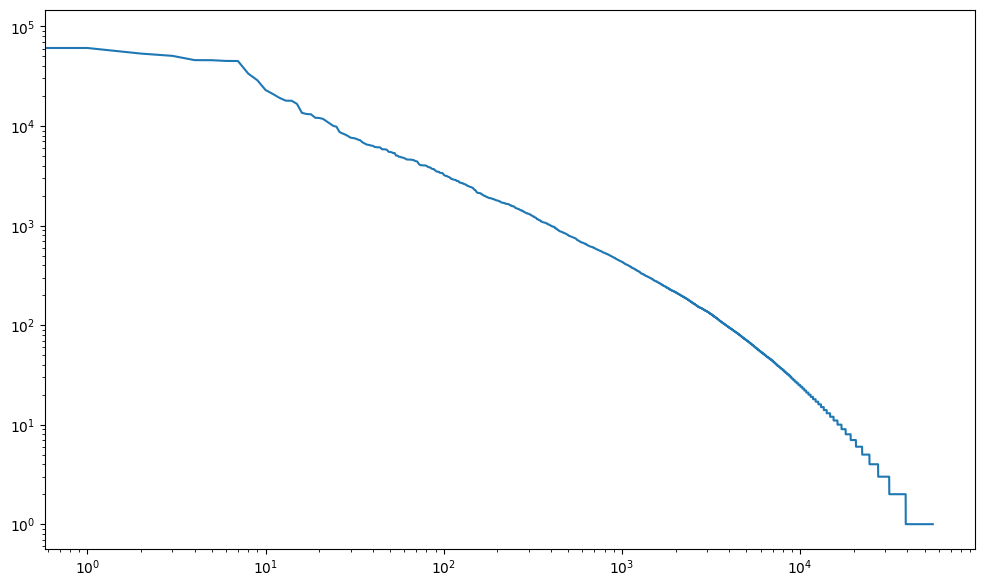

In [69]:
global_frequency_ranked_list = sorted(global_filtered_frequency_list.items(), key=lambda x: (x[1], x[0]), reverse=True)
occurences = dict(global_frequency_ranked_list).values()

plt.figure(figsize=(12,7))
plt.yscale("log")
plt.xscale("log")
plt.plot(occurences)
plt.show()

# Install Morfeusz (Binding dla Pythona) and use it to find all words that do not appear in that dictionary. https://colab.research.google.com/drive/14XM3dxELqEghdjB2do8i8YMWnYWfr9p6#scrollTo=h4LuD9uhh1NF

# Load SGJP dictionary (Słownik SGJP dane tekstowe) to ElasticSearch (one document for each form) and use fuzzy matching to obtain the possible corrections of the 30 words with 5 occurrences that do not belong to the dictionary.

In [2]:
unknown_words = [('dzu', 5766),
 ('poz', 45028),
 ('kazeiniany', 1),
 ('realokacji', 10),
 ('kazeinianów', 4),
 ('późn', 1065),
 ('sce', 3),
 ('dzurz', 218),
 ('phs', 53),
 ('silesia', 1),
 ('oo', 15),
 ('cedler', 1),
 ('sendzimira', 1),
 ('zdawczo', 1),
 ('montego', 2),
 ('bay', 2),
 ('spadolotni', 1),
 ('itp', 97),
 ('inte', 1),
 ('gracyjnymi', 1),
 ('społeczno', 1),
 ('logii', 1),
 ('przepro', 1),
 ('wadza', 1),
 ('szkolno', 4),
 ('kalibracyjnymi', 1),
 ('obrotunależy', 1),
 ('vitro', 32),
 ('iia', 19),
 ('iib', 6)]

In [3]:
unknown_words_sorted = [('poz', 45028),
 ('dzu', 5766),
 ('późn', 1065),
 ('str', 514),
 ('gmo', 298),
 ('dzurz', 218),
 ('sww', 214),
 ('skw', 194),
 ('ex', 169),
 ('ike', 162),
 ('zm', 120),
 ('jt', 120),
 ('remediacji', 120),
 ('ure', 103),
 ('rozdz', 102),
 ('itp', 97),
 ('uke', 97),
 ('kn', 95),
 ('np', 85),
 ('cn', 83),
 ('pkwiu', 81),
 ('udt', 77),
 ('bswsg', 70),
 ('bswp', 66),
 ('biobójczych', 63),
 ('phs', 53),
 ('fep', 42),
 ('mgo', 41),
 ('utk', 40),
 ('frd', 36)]

In [4]:
random_unknown_words_with_len_5 = [('winopochodne', 5),
 ('ppkt', 5),
 ('regazyfikacyjnego', 5),
 ('odbieralnice', 5),
 ('shigella', 5),
 ('iiin', 5),
 ('betezda', 5),
 ('państwamistronami', 5),
 ('wlkp', 5),
 ('denitracyjne', 5),
 ('zawart', 5),
 ('rialnego', 5),
 ('jed', 5),
 ('rci', 5),
 ('teryto', 5),
 ('ponitracyjnego', 5),
 ('xxxixxliv', 5),
 ('ivn', 5),
 ('fd', 5),
 ('cz', 5),
 ('chelatującym', 5),
 ('łips', 5),
 ('najmnie', 5),
 ('odgazowywacze', 5),
 ('sposb', 5),
 ('urt', 5),
 ('tzn', 5),
 ('nitracyjne', 5),
 ('inci', 5),
 ('aiiibiiiciii', 5)]

In [5]:
es_url = "http://localhost:9200"
es = Elasticsearch(es_url)

In [6]:
es.info()

ObjectApiResponse({'name': '4eb6bbf48337', 'cluster_name': 'docker-cluster', 'cluster_uuid': 'ZW8ilXXfTOS_RXihBz65Tg', 'version': {'number': '8.4.3', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': '42f05b9372a9a4a470db3b52817899b99a76ee73', 'build_date': '2022-10-04T07:17:24.662462378Z', 'build_snapshot': False, 'lucene_version': '9.3.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})

In [7]:
es_analyzer = "sgjp_es_analyzer"
es_index = "sgjp"

In [11]:
resp = rq.delete(url = f"{es_url}/{es_index}")
resp.json()

In [12]:
response = rq.put(
    url = f"{es_url}/{es_index}",
    json = {
    "mappings":{
        "properties":{
            "text": { # this need to be same as filed in json to which we are gonna to load data!!!!!
                "type": "text",
                "analyzer": "keyword" # https://www.elastic.co/guide/en/elasticsearch/reference/current/analysis-keyword-analyzer.html
            }
        }
    }
})

In [13]:
response.json()

{'acknowledged': True, 'shards_acknowledged': True, 'index': 'sgjp'}

In [14]:
import csv

In [15]:
current_dir = os.getcwd()

In [16]:
sgjp_content = []
with open(f"{current_dir}/data/sgjp/sgjp-20221030.tab", encoding='utf-8') as f:
    f_reader = csv.reader(f, delimiter='\t')
    for line in f_reader:
        sgjp_content.append(line)

In [17]:
sgjp_content[29][0]

'AA'

In [18]:
sgjp_content_clean = sgjp_content[28:]

In [19]:
# for i, line in enumerate(sgjp_content[28:]):
#     response = rq.put(
#         url = f"{es_url}/{es_index}/_doc/{i}",
#             json = {
#                 "text": f"{line[0]}"
#             }) wywala mi się przy tym

In [20]:
from elasticsearch.helpers import parallel_bulk
from collections import deque
from tqdm import tqdm

In [21]:
def extract_word_for_bulk_gen(sgjp_content_clean):
    for i, line in enumerate(sgjp_content_clean):
        yield {
            "_op_type": "create",
            "_index": es_index,
            "_id": i,
            "text": line[0]
        }

In [23]:
bar = tqdm(desc="Upload...", total=len(sgjp_content_clean))
for _ in parallel_bulk(client=es, actions=extract_word_for_bulk_gen(sgjp_content_clean)):
    bar.update(1)

Upload...: 100%|███████████████████| 7412267/7412267 [03:30<00:00, 46401.55it/s]

In [111]:
# pb = parallel_bulk(client=es, actions=extract_word_for_bulk_gen(sgjp_content_clean))
# deque(pb, maxlen = 0)

# Compare the results of your algorithm and output of ES.

In [25]:
for token, _ in unknown_words:
#     response = rq.get(
#         url=f"{es_url}/{es_index}/_search",
#         json={
#             "query": {
#                 "match": {
#                     "text": {
#                         "query": token,
#                         "fuzziness": 2
#                     }
#                 }
#             }
#         }
#     )
    response = es.search(index=es_index, query={'match': {'text': {'query': token, 'fuzziness': 2}}})
    corrections = [res["_source"]["text"] for res in response["hits"]["hits"]]
    corrections_merged = "; ".join(corrections)
    print(f"Word: {token} - corrections: {corrections_merged}")

Word: dzu - corrections: bzu; dnu; ozu; dwu; dwu; dwu; dwu; dziu; szu; dz
Word: poz - corrections: poz; Koz; Moz; Roz; paz; paz; poć; pod; poi; doz
Word: kazeiniany - corrections: kamieniany; karliniany; karsiniany; kaliniany; kaliniany
Word: realokacji - corrections: realizacji; realizacji; realizacji; replikacji; replikacji; replikacji; rewokacji; rewokacji; rewokacji; alokacji
Word: kazeinianów - corrections: 
Word: późn - corrections: późni; późno; późna; późna; późne; późne; późne; późne; późni; późno
Word: sce - corrections: Esce; Oce; Oce; Esce; osce; esce; scen; scs; sie; sie
Word: dzurz - corrections: szurz; zdurz; durz; bzdurz; ciurz; diurez; Bzura; Bzuro; Bzury; Bzury
Word: phs - corrections: pas; pas; phi; phi; phu; phy; pąs; pas; pas; ps
Word: silesia - corrections: silenia; silenia; Zalesia; Zalesia; Filusia; Kilisia; Milenia; Polesia; Polesia; Wilusia
Word: oo - corrections: oo; bo; bo; co; co; co; co; do; do; Fo
Word: cedler - corrections: Wedler; Wedler; redler; Zeidle

In [26]:
for token, _ in unknown_words_sorted:
    response = rq.get(
        url=f"{es_url}/{es_index}/_search",
        json={
            "query": {
                "match": {
                    "text": {
                        "query": token,
                        "fuzziness": 2
                    }
                }
            }
        }
    )
    response = response.json()
    corrections = [res["_source"]["text"] for res in response["hits"]["hits"]]
    corrections_merged = "; ".join(corrections)
    print(f"Word: {token} - corrections: {corrections_merged}")

Word: poz - corrections: poz; Koz; Moz; Roz; paz; paz; poć; pod; poi; doz
Word: dzu - corrections: bzu; dnu; ozu; dwu; dwu; dwu; dwu; dziu; szu; dz
Word: późn - corrections: późni; późno; późna; późna; późne; późne; późne; późne; późni; późno
Word: str - corrections: str; astr; Otr; itr; ser; sir; sir; star; ster; sto
Word: gmo - corrections: dmo; emo; emo; emo; emo; emo; emo; emo; emo; emo
Word: dzurz - corrections: szurz; zdurz; durz; bzdurz; ciurz; diurez; Bzura; Bzuro; Bzury; Bzury
Word: sww - corrections: suw; siw; sów; swa; swe; swą; swą; swe; swe; swe
Word: skw - corrections: suw; siw; ska; ski; sków; sów; sakw; kw; Bokw; Dow
Word: ex - corrections: em; eś; Rex; ee; ef; ef; eh; el; em; en
Word: ike - corrections: Mike; Mike; Mike; Mike; Nike; ikr; iks; iks; iks; ile
Word: zm - corrections: zm; zm; em; om; im; em; hm; im; izm; km
Word: jt - corrections: at; at; It; je; je; ją; ot; et; ja; jat
Word: remediacji - corrections: repudiacji; repudiacji; repudiacji; remediach; remediami

In [27]:
for token, _ in random_unknown_words_with_len_5:
    response = rq.get(
        url=f"{es_url}/{es_index}/_search",
        json={
            "query": {
                "match": {
                    "text": {
                        "query": token,
                        "fuzziness": 2
                    }
                }
            }
        }
    )
    response = response.json()
    corrections = [hit["_source"]["text"] for hit in response["hits"]["hits"]]
    corrections_merged = "; ".join(corrections)
    print(f"Word: {token} - corrections: {corrections_merged}")

Word: winopochodne - corrections: 
Word: ppkt - corrections: pakt; pkt; pkt; apka; apki; apki; apko; apką; apkę; Dikt
Word: regazyfikacyjnego - corrections: denazyfikacyjnego; denazyfikacyjnego; niegazyfikacyjnego; niegazyfikacyjnego; gazyfikacyjnego; gazyfikacyjnego
Word: odbieralnice - corrections: odbieralnie; odbieralniom; odbieralnika; odbieralniki; odbieralniku; odbieralniku; odbieralnych; odbieralnych; odbieralniach; odbieralnych
Word: shigella - corrections: 
Word: iiin - corrections: iwin; imin; iii; Alin; Anin; Birn; Blin; Blin; Chin; Dian
Word: betezda - corrections: etezja
Word: państwamistronami - corrections: 
Word: wlkp - corrections: wlep; alka; alki; alki; alko; alką; alkę; alko; alko; clip
Word: denitracyjne - corrections: defibracyjne; defibracyjne; defibracyjne; defibracyjne; penetracyjne; penetracyjne; penetracyjne; penetracyjne; denotacyjne; denotacyjne
Word: zawart - corrections: Gawart; Gawart; zawarć; zawarz; zawarta; zawarte; zawarte; zawarto; zawarty; zawarty